Run the cells below if you need to install the necessary Python libraries

In [4]:
!pip install pandas
!pip install seaborn
!pip install numpy
!pip install matplotlib
!pip install IPython

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython import display
%matplotlib inline

# Correlation: What is it?

In this notebook, we will discuss the idea of correlation. Formally, correlation is a statistical measurement of the relationship between two variables. Here are some examples:
- Exercise and Calorie Loss
- Height and Weight
- Temperature and Ice Cream Sales
- Hours studied and Score on Exam
- Spending and Salary
- Tardiness and School Grades

Is the number of people who drowned by falling into a pool correlated with the amount of films that Nicolas Cage appeared in per year? If so, is this a casual relationship or is it just coincidence?

In [11]:
print('Source: http://www.tylervigen.com/spurious-correlations')
display.Image('cage.png')

Source: http://www.tylervigen.com/spurious-correlations


# Part 1: Stats Review

In [12]:
arr = np.array([3, 7, 9, 15, 4, 6, 19, 5, 1, 9, 15, 7, 9, 3, 2, 9, 5, 5, 2, 3, 5, 9, 14, 13, 14, 2, 5, 19, 5, 3])

**Question 1.1** Find the mean of the array ```arr``` and store it in the variable `arr_mean`

*Hint: Use the method* ```np.mean(array)```

In [13]:
arr_mean = np.mean(arr)
arr_mean

7.5666666666666664

**Question 1.2** Find the standard deviation of the array ```arr``` without using `np.std` and store it in the variable `arr_std`

The formula for standard deviation is $$SD(X) = \sqrt{\frac{\sum{(x_i - \overline{x})^2}}{n}}$$

In [14]:
arr_std = np.sqrt(sum((arr - arr_mean)**2) / (len(arr)))
arr_std

5.0641441088850891

**Question 1.3** Use `np.std` to check that the standard deviation that you computed is correct

In [15]:
std = np.std(arr)
std == arr_std

True

Converting an array to "Standard Units" means that each value will now correspond to the amount of standard deviations it is away from the mean(you may recognize this as z-score). The next cell will define a function `standard_units` that converts an array of numbers to standard units.

In [16]:
def standard_units(array):
    return (array - np.mean(array))/np.std(array)

**Question 1.4** Use our new function to convert `arr` into standard units and store it into the variable `standard_arr`

In [17]:
standard_arr = standard_units(arr)
standard_arr

array([-0.90176475, -0.11189782,  0.28303565,  1.46783606, -0.70429802,
       -0.30936455,  2.257703  , -0.50683129, -1.29669822,  0.28303565,
        1.46783606, -0.11189782,  0.28303565, -0.90176475, -1.09923149,
        0.28303565, -0.50683129, -0.50683129, -1.09923149, -0.90176475,
       -0.50683129,  0.28303565,  1.27036933,  1.07290259,  1.27036933,
       -1.09923149, -0.50683129,  2.257703  , -0.50683129, -0.90176475])

Now, we will create an array called `arr2` that will be very similar to arr but with slightly different values. `arr2` is converted into standard units in the cell block below.

In [18]:
arr2 = np.array([3, 8, 7, 13, 5, 7, 20, 4, 1, 9, 16, 8, 15, 4, 4, 7, 6, 5, 10, 3, 5, 9, 14, 14, 12, 4, 5, 15, 5, 5])
standard_arr2 = standard_units(arr2)

Here is a scatterplot of `arr` on the x-axis and `arr_2` on the y_axis. Does our data look linear? Why?

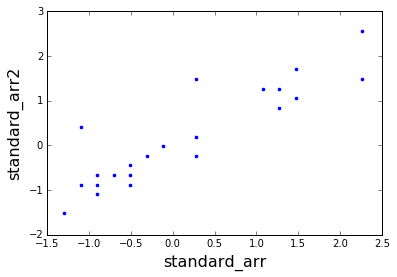

In [19]:
sns.scatterplot(standard_arr, standard_arr2)
plt.xlabel('standard_arr', size=16)
plt.ylabel('standard_arr2', size=16);

Below is a regplot(regression plot) of the same data. A Seaborn Regplot is similar to a scatterplot, but it draws a line of best fit through the data.

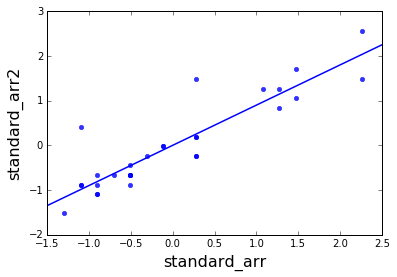

In [20]:
sns.regplot(standard_arr, standard_arr2, ci=None)
plt.xlabel('standard_arr', size=16)
plt.ylabel('standard_arr2', size=16);

Finally, we will calculate the correlation coefficient(commonly denoted as $r$) of these two arrays. The **correlation** is the linear association between two variables. Visually, you can interpret this as how well the data clusters around a straight line.

We can calculate correlation by 
- Converting both arrays to standard units
- Finding the product of the two standardized arrays
- Finding the average of the products

Correlation must be between $-1$ and $1$, where the magnitude represents the steepness of the best-fit line and the sign represents whether the variables are positively correlated or negatively correlated.

**Question 1.5** Compute the correlation coefficient of `standard_arr` and `standard_arr2` and store it in the variable `r`

*Hint: `arr` and `arr2` are already in standard units*

In [21]:
r = np.mean(standard_arr * standard_arr2)
r

0.90068574881661334

Is our data positively or negatively correlated? Does the value of $r$ make sense given the graphs above?

# Part 2: College Data
Now that we have the basic building blocks to calculate correlation, we will attempt to answer the following question.

**Is there a correlation between a college's admission rate and its average SAT score?**

Below, we will use a dataset from *college scorecard* that contains college admission data from 2018. The data is extracted using a common Python datascience library called 'pandas'. You are welcome to try and follow along, but feel free to just run the cells below.

CSV Source: https://collegescorecard.ed.gov/data/

In [22]:
college = pd.read_csv('college.csv', encoding = "ISO-8859-1")
college.head()

,UNITID,INSTNM,CITY,STABBR,CONTROL,CCBASIC,ADM_RATE,SAT_AVG,UGDS,UGDS_WHITE,...,NPT4_PRIV,COSTT4_A,TUITFTE,INEXPFTE,PFTFAC,PCTPELL,C150_4,PFTFTUG1_EF,RET_FT4,PCTFLOAN
0,100654,Alabama A & M University,Normal,AL,1,18.0,0.5256,827.0,4206.0,0.0333,...,NaN,21475.0,9427.0,7437.0,0.8967,0.7356,0.3525,0.8578,0.6595,0.8284
1,100663,University of Alabama at Birmingham,Birmingham,AL,1,15.0,0.8569,1107.0,11383.0,0.5922,...,NaN,20621.0,9899.0,17920.0,0.9072,0.3460,0.5554,0.5041,0.8288,0.5214
2,100690,Amridge University,Montgomery,AL,2,20.0,NaN,NaN,291.0,0.2990,...,12992.0,16370.0,12459.0,5532.0,0.6000,0.6801,0.2222,0.5000,0.0000,0.7795
3,100706,University of Alabama in Huntsville,Huntsville,AL,1,16.0,0.8203,1219.0,5451.0,0.6988,...,NaN,21107.0,8956.0,10211.0,0.6221,0.3072,0.4614,0.4750,0.7696,0.4596
4,100724,Alabama State University,Montgomery,AL,1,19.0,0.5326,851.0,4811.0,0.0158,...,NaN,18184.0,7733.0,7618.0,0.6539,0.7347,0.2632,0.8812,0.5725,0.7554


In [23]:
college = college[['INSTNM', 'ADM_RATE', 'SAT_AVG']]
college = college.rename(index=str, columns={'INSTNM': 'Name','ADM_RATE': 'Admit', 'SAT_AVG': 'SAT'})
college = college[college.Admit.notnull()]
college = college[college.SAT.notnull()]
college.head()

,Name,Admit,SAT
0,Alabama A & M University,0.5256,827.0
1,University of Alabama at Birmingham,0.8569,1107.0
3,University of Alabama in Huntsville,0.8203,1219.0
4,Alabama State University,0.5326,851.0
5,The University of Alabama,0.5105,1185.0


If you want to see the admission rate and average SAT score of a college that you're interested in(or maybe applied to), replace 'Berkeley' with the college of interest. 

Note: The code below is a simple string contains method, so keep your query short and simple.

In [24]:
def find_college(name):
    return college[college['Name'].str.contains(name)]

find_college('Berkeley')

,Name,Admit,SAT
243,University of California-Berkeley,0.1602,1382.0


**Question 2.1:** `admit` is an array of admission rates for each college and `sat` is an array of the average SAT score for admitted applicants. Find the mean and standard deviation for both arrays.

In [25]:
admit = np.array(college.Admit)
sat = np.array(college.SAT)

admit_mean = np.mean(admit)
admit_std = np.std(admit)
sat_mean = np.mean(sat)
sat_std = np.std(sat)

**Question 2.2:** Using the `standard_units` function that we defined earlier, convert `admit` and `sat` to standard units 

In [26]:
admit_standard = standard_units(admit)
sat_standard = standard_units(sat)

**Question 2.3.1:** Create a scatterplot of `admit_standard` and `sat_standard`

1) Are the variables positively or negatively correlated?

2) Is the correlation between our variables weak or strong? How do you know?

3) What do you expect the graph to look like? Make a prediction of the correlation value.

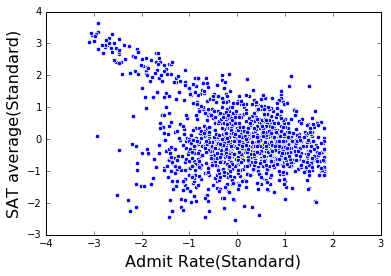

In [27]:
sns.scatterplot(admit_standard, sat_standard)
plt.xlabel("Admit Rate(Standard)", size=16)
plt.ylabel("SAT average(Standard)", size=16);


In [28]:
r_prediction = -0.5

**Question 2.3.2:** Find the correlation between admission rate and average sat score.

In [29]:
r_college = np.mean(admit_standard * sat_standard)
r_college

-0.35436239595131053

**Question 2.4:** Given our correlation value `r_college`:

1) Are the variables positively or negatively correlated?

2) Is the correlation between our variables weak or strong? How do you know?

3) What do you expect the graph to look like?

**Question 2.5:** Create a regplot of `admit_standard` and `sat_standard`. Does this graph match your expectations?

*Hint: See the regplot created above*

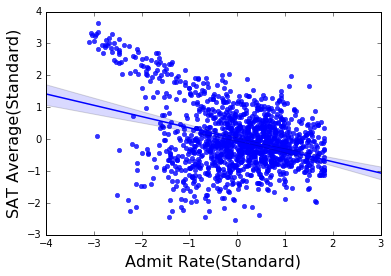

In [30]:
sns.regplot(admit_standard, sat_standard)
plt.xlabel('Admit Rate(Standard)', size=16)
plt.ylabel('SAT Average(Standard)', size=16);

Hopefully, you have gained a better intuition about what correlation is from this notebook. There are a lot of intricacies about correlation that we didn't cover to keep things relatively simple such as:

- What if our data isn't linear at all? Does our calculation of `r` still work?
- Where do the equations come from? Why do we have to convert to standard units?

Thanks for completing the notebook!